# Hack the Crisis - PandMinder

**Module:** Extraction of data by regions in Sweden.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests # The requests library is an 
import bs4 as bs # BeautifulSoup4 is a Python library 

 

source = requests.get("https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/bekraftade-fall-i-sverige/") 

soup = bs.BeautifulSoup(source.content, features='html.parser')

link_to_excel = soup.find_all("a", title="Excel-fil",limit=1)[0]
link_to_excel.get('href')

dfs = pd.read_excel(link_to_excel.get('href'), sheet_name=None)

In [2]:
#Obtain the date
sheetnames = dfs.keys()
date_sheet = list(sheetnames)[-1]
date_string = date_sheet.replace('FOHM ','')
import dateutil.parser
date = dateutil.parser.parse(date_string)
print(date)

2020-04-04 00:00:00


In [3]:
#Extract cases per region
region_cases = dfs['Antal per dag region']
region_cases.set_index('Statistikdatum',inplace=True)

<Figure size 1152x864 with 0 Axes>

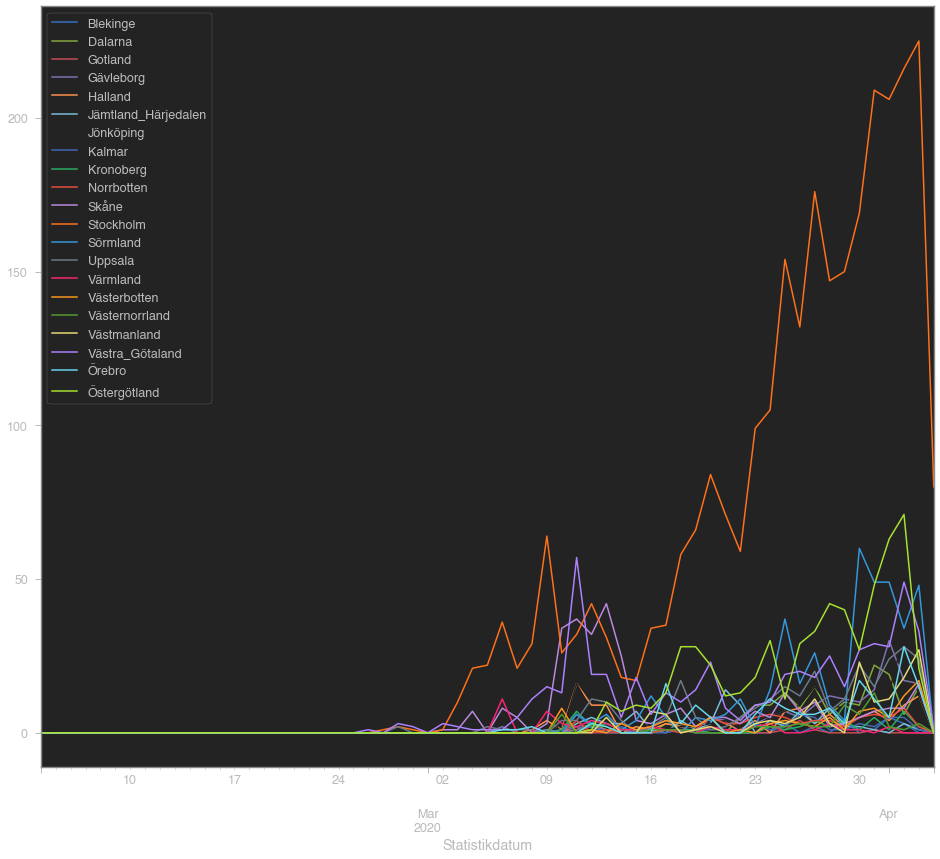

In [4]:
fig = plt.figure(figsize=(16,12))
region_cases.drop('Totalt_antal_fall',axis=1).plot(figsize=(16,14))

In [5]:
region_cases = region_cases.unstack()
region_cases.head()

                   Statistikdatum
Totalt_antal_fall  2020-02-04        1
                   2020-02-05        0
                   2020-02-06        0
                   2020-02-07        0
                   2020-02-08        0
dtype: int64

In [6]:
region_cases.drop('Totalt_antal_fall',level=0,inplace=True)

In [7]:
region_cases.head()

          Statistikdatum
Blekinge  2020-02-04        0
          2020-02-05        0
          2020-02-06        0
          2020-02-07        0
          2020-02-08        0
dtype: int64

In [8]:
region_cases.index.rename('Region', level=0,inplace=True)
region_cases.index.rename('Date', level=1,inplace=True)

region_cases

Region        Date      
Blekinge      2020-02-04     0
              2020-02-05     0
              2020-02-06     0
              2020-02-07     0
              2020-02-08     0
              2020-02-09     0
              2020-02-10     0
              2020-02-11     0
              2020-02-12     0
              2020-02-13     0
              2020-02-14     0
              2020-02-15     0
              2020-02-16     0
              2020-02-17     0
              2020-02-18     0
              2020-02-19     0
              2020-02-20     0
              2020-02-21     0
              2020-02-22     0
              2020-02-23     0
              2020-02-24     0
              2020-02-25     0
              2020-02-26     0
              2020-02-27     0
              2020-02-28     0
              2020-02-29     0
              2020-03-01     0
              2020-03-02     0
              2020-03-03     0
              2020-03-04     0
                            ..
Östergötland  

In [9]:
region_cases = pd.concat([region_cases], keys=['New_cases'], names=['Metric'])
region_cases

Metric     Region        Date      
New_cases  Blekinge      2020-02-04     0
                         2020-02-05     0
                         2020-02-06     0
                         2020-02-07     0
                         2020-02-08     0
                         2020-02-09     0
                         2020-02-10     0
                         2020-02-11     0
                         2020-02-12     0
                         2020-02-13     0
                         2020-02-14     0
                         2020-02-15     0
                         2020-02-16     0
                         2020-02-17     0
                         2020-02-18     0
                         2020-02-19     0
                         2020-02-20     0
                         2020-02-21     0
                         2020-02-22     0
                         2020-02-23     0
                         2020-02-24     0
                         2020-02-25     0
                         2020-02-26     

## Additional regional data

In [10]:
region_data = dfs['Totalt antal per region']
region_data.set_index('Region', inplace=True)
region_data

,Totalt_antal_fall,Fall_per_100000_inv,Totalt_antal_intensivvårdade,Totalt_antal_avlidna
Region,,,,
Blekinge,30,18.796286,2,1
Dalarna,163,56.603905,11,16
Gotland,12,20.105217,1,0
Gävleborg,163,56.718933,14,4
Halland,126,37.741726,10,9
Jämtland Härjedalen,86,65.744209,2,0
Jönköping,199,54.730625,17,13
Kalmar,47,19.148815,4,1
Kronoberg,49,24.321360,1,0


In [11]:
region_data = region_data.unstack()
region_data.index.rename('Metric', level=0, inplace=True)

In [12]:
region_data.index = region_data.index.swaplevel(0, 1)

In [13]:
region_data = pd.concat([region_data], keys=[date], names=['Date'])

In [14]:
region_data

Date        Region               Metric                      
2020-04-04  Blekinge             Totalt_antal_fall                 30.000000
            Dalarna              Totalt_antal_fall                163.000000
            Gotland              Totalt_antal_fall                 12.000000
            Gävleborg            Totalt_antal_fall                163.000000
            Halland              Totalt_antal_fall                126.000000
            Jämtland Härjedalen  Totalt_antal_fall                 86.000000
            Jönköping            Totalt_antal_fall                199.000000
            Kalmar               Totalt_antal_fall                 47.000000
            Kronoberg            Totalt_antal_fall                 49.000000
            Norrbotten           Totalt_antal_fall                 74.000000
            Skåne                Totalt_antal_fall                322.000000
            Stockholm            Totalt_antal_fall               2849.000000
            Sö

## Merge the data sets

In [15]:
print('region_data', region_data.index.names)
print('region_cases', region_cases.index.names)

region_data ['Date', 'Region', 'Metric']
region_cases ['Metric', 'Region', 'Date']


In [16]:
region_data.index = region_data.index.swaplevel(0, 2)
print('region_data', region_data.index.names)
print('region_cases', region_cases.index.names)

region_data ['Metric', 'Region', 'Date']
region_cases ['Metric', 'Region', 'Date']


In [17]:
region_data = pd.concat([region_data, region_cases])
region_data

Metric               Region               Date      
Totalt_antal_fall    Blekinge             2020-04-04      30.000000
                     Dalarna              2020-04-04     163.000000
                     Gotland              2020-04-04      12.000000
                     Gävleborg            2020-04-04     163.000000
                     Halland              2020-04-04     126.000000
                     Jämtland Härjedalen  2020-04-04      86.000000
                     Jönköping            2020-04-04     199.000000
                     Kalmar               2020-04-04      47.000000
                     Kronoberg            2020-04-04      49.000000
                     Norrbotten           2020-04-04      74.000000
                     Skåne                2020-04-04     322.000000
                     Stockholm            2020-04-04    2849.000000
                     Sörmland             2020-04-04     412.000000
                     Uppsala              2020-04-04     274.00

## Retrieve relevant data

In [18]:
list(region_data.index.levels[0])

['Fall_per_100000_inv',
 'New_cases',
 'Totalt_antal_avlidna',
 'Totalt_antal_fall',
 'Totalt_antal_intensivvårdade']

In [19]:
region_data['Totalt_antal_fall']

Region               Date      
Blekinge             2020-04-04      30.0
Dalarna              2020-04-04     163.0
Gotland              2020-04-04      12.0
Gävleborg            2020-04-04     163.0
Halland              2020-04-04     126.0
Jämtland Härjedalen  2020-04-04      86.0
Jönköping            2020-04-04     199.0
Kalmar               2020-04-04      47.0
Kronoberg            2020-04-04      49.0
Norrbotten           2020-04-04      74.0
Skåne                2020-04-04     322.0
Stockholm            2020-04-04    2849.0
Sörmland             2020-04-04     412.0
Uppsala              2020-04-04     274.0
Värmland             2020-04-04      53.0
Västerbotten         2020-04-04      97.0
Västernorrland       2020-04-04      61.0
Västmanland          2020-04-04     139.0
Västra Götaland      2020-04-04     537.0
Örebro               2020-04-04     166.0
Östergötland         2020-04-04     584.0
dtype: float64

In [20]:
region_data['New_cases','Skåne'].tail()

/Users/marcus/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)


Date
2020-03-31     7.0
2020-04-01     8.0
2020-04-02     8.0
2020-04-03    16.0
2020-04-04     0.0
dtype: float64

# Merge with data from Socialstyrelsen

In [21]:
clinicians = pd.read_excel('socialstyrelsen.xlsx', sheet_name="läkare_per_region")

In [22]:
clinicians

,Region,Alternativ_Benämning,Apotekare,Arbetsterapeut,Audionom1,Barnmorska,Biomedicinsk analytiker1,Dietist,Fysioterapeut,Kiropraktor,...,Läkare,Naprapat,Optiker,Ortopedingenjör1,Psykolog,Receptarie,Sjukhusfysiker,Sjuksköterska,Tandhygenist,Tandläkare
0,Stockholm,Stockholms län,52,70,8,82,77,14,139,11,...,448,20,29,1,113,40,4,943,35,87
1,Uppsala,Uppsala län,50,78,12,90,115,19,148,7,...,515,9,25,0,119,61,8,1205,39,85
2,Sörmland,Södermanlands län,23,93,9,66,47,12,129,8,...,321,7,19,3,56,32,3,937,36,76
3,Östergötland,Östergötlands län,18,135,10,57,103,13,130,4,...,429,7,22,4,68,49,4,1089,38,70
4,Jönköping,Jönköpings län,24,145,10,78,91,8,118,3,...,344,2,24,7,52,40,3,1129,50,79
5,Kronoberg,Kronobergs län,10,86,8,59,63,8,108,3,...,322,5,23,5,52,47,4,1150,41,82
6,Kalmar,Kalmar län,14,95,8,66,68,9,129,5,...,335,5,28,5,49,79,4,1113,36,70
7,Gotland,Gotlands län,12,109,12,72,82,10,133,0,...,434,21,14,0,63,68,2,1142,36,80
8,Blekinge,Blekinge län,24,75,9,74,85,8,100,3,...,366,4,18,6,52,40,2,1320,45,80
9,Skåne,Skåne län,25,85,7,66,85,12,137,6,...,408,4,22,0,87,42,5,1057,41,81


In [23]:
clinicians.drop('Alternativ_Benämning', axis=1, inplace=True)

In [24]:
relevant_cols = clinicians[['Region', 'Läkare', 'Sjuksköterska']]
relevant_cols

,Region,Läkare,Sjuksköterska
0,Stockholm,448,943
1,Uppsala,515,1205
2,Sörmland,321,937
3,Östergötland,429,1089
4,Jönköping,344,1129
5,Kronoberg,322,1150
6,Kalmar,335,1113
7,Gotland,434,1142
8,Blekinge,366,1320
9,Skåne,408,1057


In [25]:
relevant_cols.set_index('Region', inplace=True)
relevant_cols.head()

,Läkare,Sjuksköterska
Region,,
Stockholm,448,943
Uppsala,515,1205
Sörmland,321,937
Östergötland,429,1089
Jönköping,344,1129


In [26]:
relevant_cols = relevant_cols.unstack()

In [27]:
relevant_cols.index = relevant_cols.index.rename('Metric',level=0)
relevant_cols.head()

Metric  Region      
Läkare  Stockholm       448
        Uppsala         515
        Sörmland        321
        Östergötland    429
        Jönköping       344
dtype: int64

In [28]:
relevant_cols = pd.concat([relevant_cols], keys=[None], names=['Date'])

In [29]:
reordered = relevant_cols.reorder_levels(['Metric','Region','Date'])
reordered

Metric         Region           Date
Läkare         Stockholm        NaN      448
               Uppsala          NaN      515
               Sörmland         NaN      321
               Östergötland     NaN      429
               Jönköping        NaN      344
               Kronoberg        NaN      322
               Kalmar           NaN      335
               Gotland          NaN      434
               Blekinge         NaN      366
               Skåne            NaN      408
               Halland          NaN      352
               Västra Götaland  NaN      395
               Värmland         NaN      311
               Örebro           NaN      393
               Västmanland      NaN      323
               Dalarna          NaN      335
               Gävleborg        NaN      335
               Västernorrland   NaN      300
               Jämtland         NaN      379
               Västerbotten     NaN      491
               Norrbotten       NaN      272
Sjuksköterska  Sto

In [30]:
region_data = pd.concat([region_data,reordered])

## Append mobility

In [31]:
mobility = pd.read_excel('mobility index regions.xlsx', decimal=',')

In [32]:
mobility.head()

,Date,Blekinge,Dalarna,Gavleborg,Gotland,Halland,Jamtland,Jönkoping,Kalmar,Kronoberg,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra Götaland,Örebro,Östergötland
0,2020-02-16,-12.8,-6.9,-9.4,-8.3,-15.1,5.9,-21.3,-12.4,-15.7,...,-6.8,-13.3,-11.1,5.8,-13.1,-9.3,-5.9,-15.7,-12.0,-9.7
1,2020-02-17,-5.0,5.8,-4.0,-5.8,-1.9,12.9,-8.6,-1.4,-3.2,...,-3.2,-6.9,-7.2,-0.7,-0.5,-2.4,-3.6,-5.7,-6.7,-4.0
2,2020-02-18,2.5,13.1,1.6,-1.1,2.3,20.3,-2.4,0.9,-2.6,...,-0.2,-2.6,-4.5,2.1,0.9,0.9,1.1,0.9,3.6,-0.6
3,2020-02-19,1.7,11.7,2.5,-3.9,4.3,25.8,1.0,5.5,0.7,...,1.1,0.6,-0.7,12.7,4.2,2.1,6.0,3.9,6.1,4.1
4,2020-02-20,6.0,8.4,0.4,11.3,1.6,12.5,2.7,6.3,-0.9,...,0.4,0.0,-3.0,12.4,4.5,3.5,6.6,-0.7,3.1,5.1


In [33]:
mobility.set_index('Date', inplace=True)
mobility.head()

,Blekinge,Dalarna,Gavleborg,Gotland,Halland,Jamtland,Jönkoping,Kalmar,Kronoberg,Norrbotten,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra Götaland,Örebro,Östergötland
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-16,-12.8,-6.9,-9.4,-8.3,-15.1,5.9,-21.3,-12.4,-15.7,-9.9,...,-6.8,-13.3,-11.1,5.8,-13.1,-9.3,-5.9,-15.7,-12.0,-9.7
2020-02-17,-5.0,5.8,-4.0,-5.8,-1.9,12.9,-8.6,-1.4,-3.2,-2.7,...,-3.2,-6.9,-7.2,-0.7,-0.5,-2.4,-3.6,-5.7,-6.7,-4.0
2020-02-18,2.5,13.1,1.6,-1.1,2.3,20.3,-2.4,0.9,-2.6,1.9,...,-0.2,-2.6,-4.5,2.1,0.9,0.9,1.1,0.9,3.6,-0.6
2020-02-19,1.7,11.7,2.5,-3.9,4.3,25.8,1.0,5.5,0.7,0.4,...,1.1,0.6,-0.7,12.7,4.2,2.1,6.0,3.9,6.1,4.1
2020-02-20,6.0,8.4,0.4,11.3,1.6,12.5,2.7,6.3,-0.9,2.0,...,0.4,0.0,-3.0,12.4,4.5,3.5,6.6,-0.7,3.1,5.1


In [34]:
mobility = mobility.unstack()

In [35]:
mobility.index = mobility.index.rename('Region',level=0)
mobility.head()

Region    Date      
Blekinge  2020-02-16   -12.8
          2020-02-17    -5.0
          2020-02-18     2.5
          2020-02-19     1.7
          2020-02-20     6.0
dtype: float64

In [36]:
mobility = pd.concat([mobility], keys=['Mobility'], names=['Metric'])

In [37]:
mobility.head()

Metric    Region    Date      
Mobility  Blekinge  2020-02-16   -12.8
                    2020-02-17    -5.0
                    2020-02-18     2.5
                    2020-02-19     1.7
                    2020-02-20     6.0
dtype: float64

In [38]:
region_data = pd.concat([region_data, mobility])

In [39]:
region_data.to_pickle('regiondata2')

# Total cases by day and region

In [40]:
new_cases = region_data[['New_cases']].unstack('Metric')
new_cases['New_cases'] = pd.to_numeric(new_cases['New_cases'], downcast='float')

In [41]:
new_cases['Total_cases'] = new_cases.groupby(level=0)['New_cases'].cumsum()

In [42]:
total_cases = new_cases[['Total_cases']].stack()

In [43]:
total_cases.tail()

Region        Date        Metric     
Östergötland  2020-03-31  Total_cases    429.0
              2020-04-01  Total_cases    492.0
              2020-04-02  Total_cases    563.0
              2020-04-03  Total_cases    584.0
              2020-04-04  Total_cases    584.0
dtype: float32

In [44]:
total_cases = total_cases.reorder_levels(['Metric','Region','Date'])

In [45]:
total_cases.tail()

Metric       Region        Date      
Total_cases  Östergötland  2020-03-31    429.0
                           2020-04-01    492.0
                           2020-04-02    563.0
                           2020-04-03    584.0
                           2020-04-04    584.0
dtype: float32

In [46]:
region_data = pd.concat([region_data, total_cases])

In [47]:
region_data.to_pickle('regiondata3')

In [48]:
list(region_data.index.levels[1])

['Blekinge',
 'Dalarna',
 'Gavleborg',
 'Gotland',
 'Gävleborg',
 'Halland',
 'Jamtland',
 'Jämtland',
 'Jämtland Härjedalen',
 'Jämtland_Härjedalen',
 'Jönkoping',
 'Jönköping',
 'Kalmar',
 'Kronoberg',
 'Norrbotten',
 'Skåne',
 'Stockholm',
 'Sörmland',
 'Uppsala',
 'Värmland',
 'Västerbotten',
 'Västernorrland',
 'Västmanland',
 'Västra Götaland',
 'Västra_Götaland',
 'Örebro',
 'Östergötland']

In [49]:
region_data = region_data.rename(index={
    'Gavleborg': 'Gävleborg',
    'Jamtland': 'Jämtland Härjedalen',
    'Jämtland_Härjedalen': 'Jämtland Härjedalen',
    'Jönkoping': 'Jönköping',
    'Västra_Götaland': 'Västra Götaland'
                                })

In [50]:
len(list(region_data.index.levels[1]))

22

# Mobility vs cases

In [78]:
mobility = region_data[['Mobility','Total_cases']].unstack('Metric')
mobility.tail()

Metric                   Mobility  Total_cases
Region       Date                             
Östergötland 2020-03-31       NaN        429.0
             2020-04-01       NaN        492.0
             2020-04-02       NaN        563.0
             2020-04-03       NaN        584.0
             2020-04-04       NaN        584.0

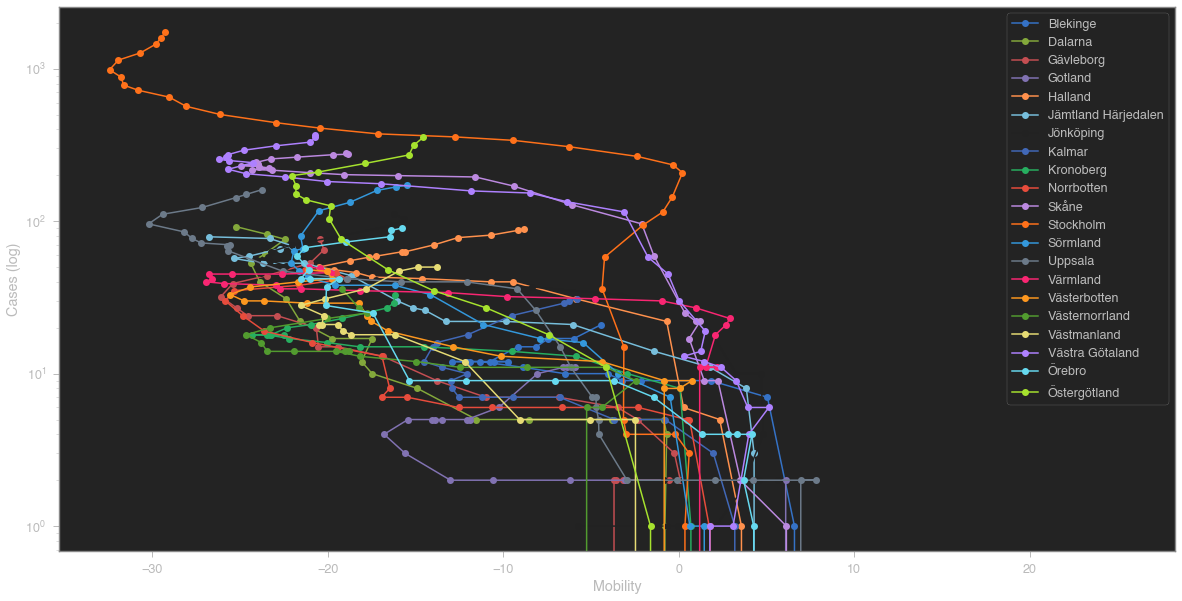

In [77]:
plt.figure(figsize=(20,10))
for region in list(mobility.index.levels[0]):
    plt.plot(mobility.loc[region]['Mobility'].rolling(5).mean(), mobility.loc[region]['Total_cases'], '-o', label=region)

plt.yscale('log')
plt.ylabel('Cases (log)')
plt.xlabel('Mobility')
plt.legend()